# 1. Business Understanding

The objectives of this data mining are:

* Knowing the best machine learning algorithms for breast cancer diagnosis classification
* The machine learning algorithms used for comparison are k-NN, Naive Bayes, and Decision Tree

# 2. Data Understanding

In [7]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("breast-cancer.csv")

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
##We notice that the 'id' column is irrelevant to us, so can drop it here instead of later
data.drop(["id"],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
##We could also check the rough distributions of the features
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


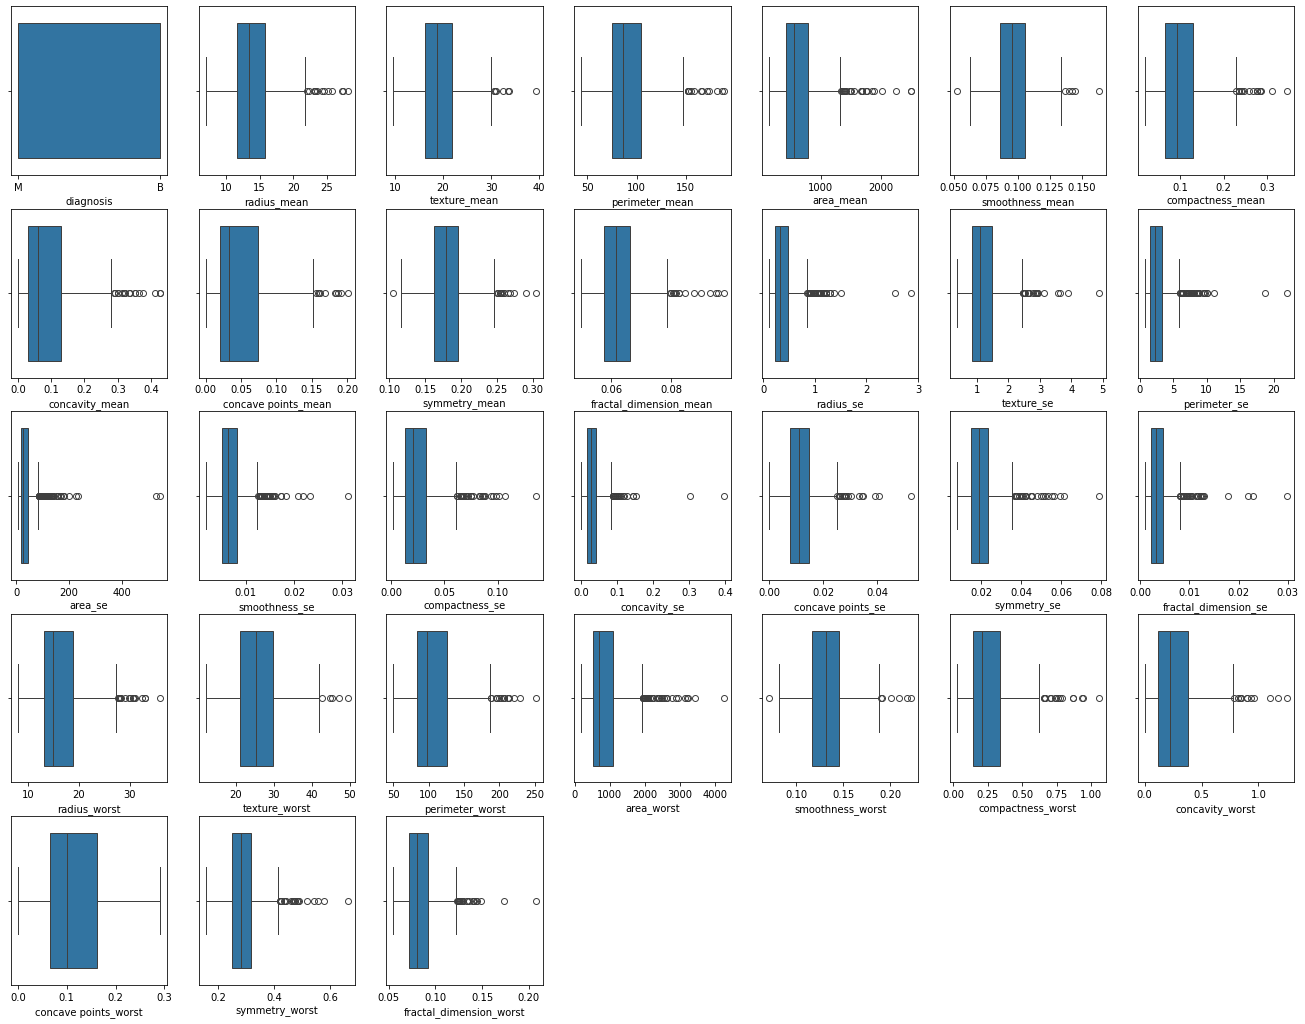

In [42]:
##And we can quickly visualize these summaries with histograms

fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(23, 18))

axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i])

for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.show()

# 3. Data Preparation

## 3.1. Check Missing Values

In [14]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

the value of each attribute is 0, it can be concluded that there is no data missing value

In [15]:
## We can also check if there is any duplicated data
data.duplicated().sum()

0

## 3.2. Drop Column id

In [ ]:
data.drop('id', axis=1, inplace=True)

data.head()

## 3.3. Exploratory Data Analysis (EDA)

### 3.3.1. Univariate Analysis

In [47]:
corr = data.corr()

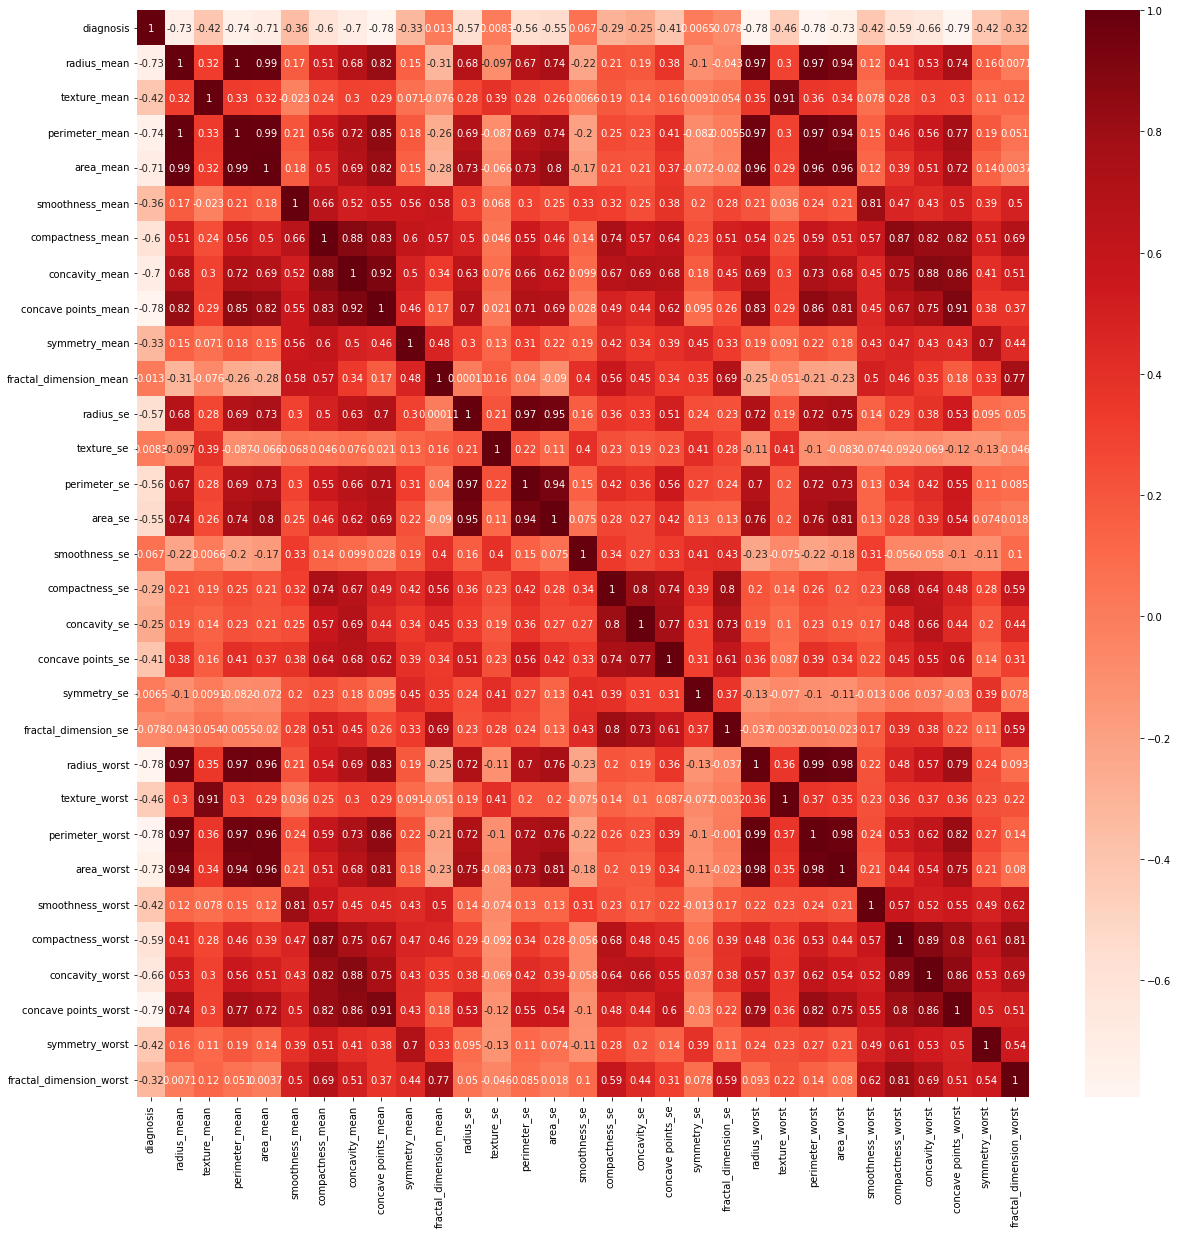

In [49]:
##Now check the strength of the relationship between the features
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='Reds')
plt.show()

<Axes: ylabel='count'>

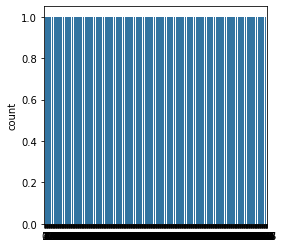

In [50]:
# Bar Chart - Attribute diagnosis

plt.figure(figsize=(4,4))
sns.countplot(data['diagnosis'])

<Axes: xlabel='radius_mean', ylabel='Count'>

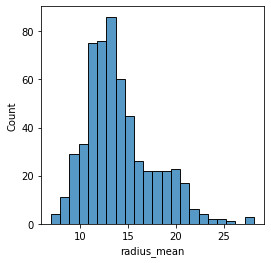

In [51]:
# Histogram Bar - Attribute radius_mean

plt.figure(figsize=(4,4))
sns.histplot(data['radius_mean'])

<Axes: ylabel='texture_mean'>

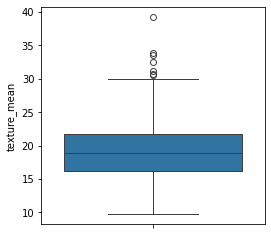

In [52]:
# Box Plot - Attribute texture_mean

plt.figure(figsize=(4,4))
sns.boxplot(data['texture_mean'])

### 3.3.2. Bivariate Analysis

<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

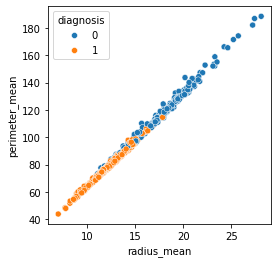

In [53]:
# Scatter Plot - Attribute radius_mean and Attribute perimeter_mean

plt.figure(figsize=(4,4))
sns.scatterplot(x=data['radius_mean'], y=data['perimeter_mean'], hue=data['diagnosis'])

There is a close positive relationship between attribute radius_mean and perimeter_mean.

The increase that occurred in attribute radius_mean was also followed by an increase in attribute perimeter_mean. And if attribute radius_mean, attribute perimeter_mean also decreased.

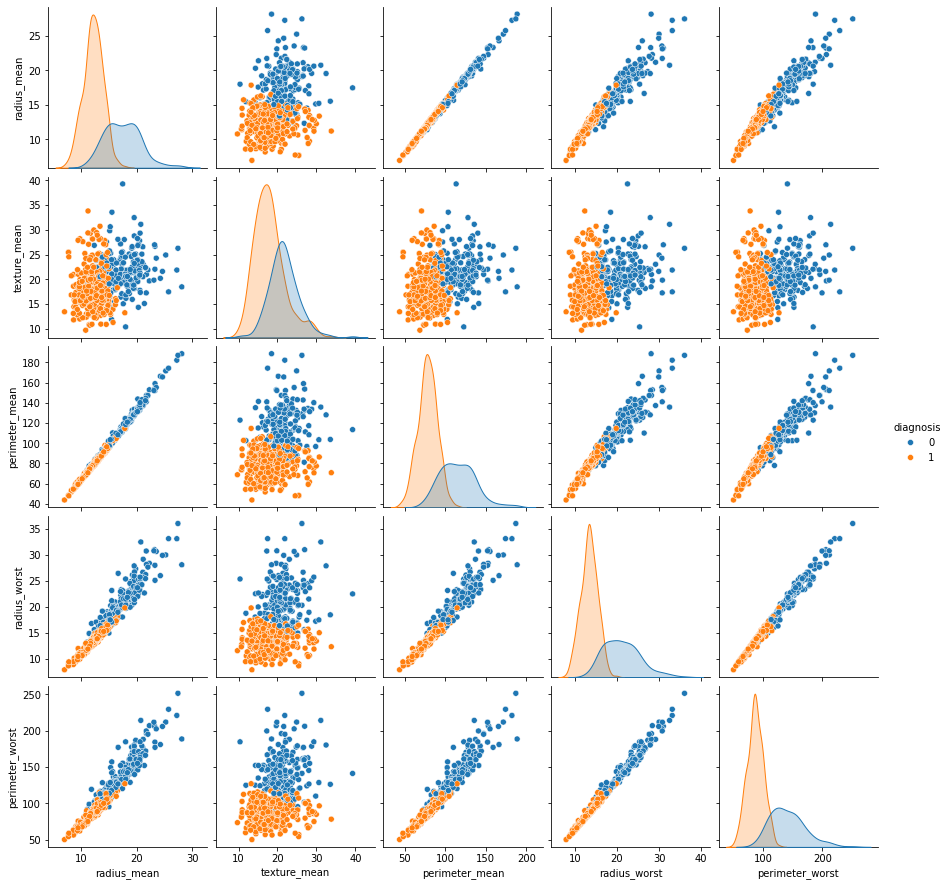

In [54]:
# pairplot

sns.pairplot(data, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

# 4. Modeling

In [ ]:
# library to divide the dataset into training data and testing data
from sklearn.model_selection import train_test_split

#library to calculate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Separate between attributes (independent, feature) and class (dependent)
x = data.drop(columns='diagnosis')
x.head()

In [ ]:
y = data['diagnosis']
y.head()

In [ ]:
# Separate data into training data and testing data, with a proportion of 70% training data, and 30% testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

print('data training:')
print(xtrain.shape)
print(ytrain.shape)
print('--------------')
print('data testing:')
print(xtest.shape)
print(ytest.shape)

## 4.1. k-NN Algorithm

In [ ]:
# import library k-NN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# using the k-NN algorithm, with the value of k being 5, calculating the euclidean distance (p=2)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [ ]:
# calculate accuracy value
print(accuracy_score(ytest, ypred))

## 4.2. Naive Bayes Algorithm

In [ ]:
# import library Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB

In [ ]:
# using the Naive Bayes algorithm
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

In [ ]:
print(accuracy_score(ytest, ypred))

## 4.3. Decision Tree Algorithm

In [ ]:
# import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# using the Decision Tree algorithm
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

In [ ]:
print(accuracy_score(ytest, ypred))

# 5. Evaluation

### Comparison of k-NN Algorithms, Naive Bayes, and Decision Trees

In [ ]:
models = [knn, nb, dt]
nilai_akurasi = []
for model in models:
    ypred = model.predict(xtest)
    akurasi = accuracy_score(ytest, ypred)
    nilai_akurasi.append(akurasi)
print(nilai_akurasi)

In [ ]:
plt.bar(['k-NN', 'Naive Bayes', 'Decision Tree'], nilai_akurasi)
plt.ylim(0.90, 1.00)
plt.title("Classification Algorithm Comparison", fontsize=14)
plt.xlabel('Classification Algorithm', fontsize=12)
plt.ylabel('Value Accuracy', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Deployment

* The results showed that the average accuracy value of the k-NN algorithm was higher than the Naive Bayes Algorithm and Decision Tree Algorithm with an average accuracy value of the k-NN Algorithm of 0.9532, while the average values of the accuracy of the Naive Bayes algorithm and the Decision Tress algorithm method were 0.9415 and 0.9239.

* Will apply the k-NN algorithm for the classification of breast cancer diagnosis